# 边界填充

# 1. 边界填充简介

① 边界填充就是对图像进行一些变换，让原始图像进行扩大。

② 边界填充函数**copyMakeBorder**的入口参数：
- BORDER_REPLICATE：**复制法**，也就是**复制最边缘像素**。
- BORDER_REFLECT：**反射法**，对感兴趣的图像中的像素在两边进行复制例如：fedcba|abcdefgh|hgfedcb   
- BORDER_REFLECT_101：反射法，也就是以最边缘像素为轴，对称，gfedcb|abcdefgh|gfedcba
- BORDER_WRAP：外包装法cdefgh|abcdefgh|abcdefg  
- BORDER_CONSTANT：常量法，常数值填充。

In [3]:
import cv2 #opencv的缩写为cv2
import matplotlib.pyplot as plt # matplotlib库用于绘图展示
import numpy as np   # numpy数值计算工具包

# 魔法指令，直接展示图，Jupyter notebook特有
%matplotlib inline   

In [4]:
img = cv2.imread('01_Picture/01_cat.jpg')

top_size,bottom_size,left_size,right_size = (50,50,50,50)  # 填充多少区域

# 最后一个入口参数为填充方式

# 方式一：复制法
replicate = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_REPLICATE) # border_replicate
# 方式二：反射法
reflect = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_REFLECT)                # border_reflect
# 方式三：反射法二(不要最边缘的像素)
reflect101 = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_REFLECT_101)         # border_redlect_101   
# 方式四：外包装法
wrap = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_WRAP)           # border_wrap
# 方式五：常量法
constant = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_CONSTANT,value=0)      # border_constant

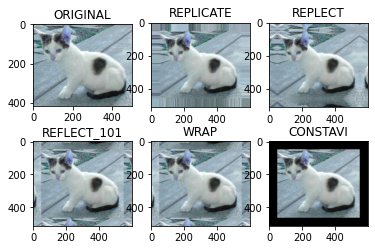

In [5]:
import matplotlib.pyplot as plt
plt.subplot(231), plt.imshow(img,'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate,'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect,'gray'), plt.title('REPLECT')
plt.subplot(234), plt.imshow(wrap,'gray'),plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236), plt.imshow(constant,'gray'),plt.title('CONSTAVI')

plt.show()

# 2. 阈值越界处理

In [8]:
img_cat = cv2.imread('01_Picture/01_cat.jpg')
img_dog = cv2.imread('01_Picture/03_dog.jpg')

img_cat2 = img_cat + 10 # 将 img_cat 矩阵中每一个值都加 10
print("img_cat",img_cat[:5,:,0])  # :5代表的是0-4，:代表的是全部
print("img_cat2",img_cat2[:5,:,0]) # 相比img_cat来说，确实是矩阵中每一个值都加上了10
print("img_cat+img_cat2",(img_cat+img_cat2)[:5,:,0])  # 0-255 若相加越界后 294 用 294%256 获得余数 38     

img_cat [[142 146 151 ... 156 155 154]
 [108 112 118 ... 155 154 153]
 [108 110 118 ... 156 155 154]
 [139 141 148 ... 156 155 154]
 [153 156 163 ... 160 159 158]]
img_cat2 [[152 156 161 ... 166 165 164]
 [118 122 128 ... 165 164 163]
 [118 120 128 ... 166 165 164]
 [149 151 158 ... 166 165 164]
 [163 166 173 ... 170 169 168]]
img_cat+img_cat2 [[ 38  46  56 ...  66  64  62]
 [226 234 246 ...  64  62  60]
 [226 230 246 ...  66  64  62]
 [ 32  36  50 ...  66  64  62]
 [ 60  66  80 ...  74  72  70]]


**cv2中add方法**和python中**自带的相加方法**不一样

In [5]:
cv2.add(img_cat,img_cat2)[:5,0] # cv2.add 是越界后取最大值 255

array([[255, 255, 255],
       [224, 246, 255],
       [226, 248, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)